# Sistemas de computação algébrica

_Funções de uma variável real_

SymPy offers several ways to solve linear and nonlinear equations and systems of equations. Of course, these functions do not always succeed in finding closed-form exact solutions. In this case, we can fall back to numerical solvers and obtain approximate solutions.

In [1]:
import sympy as sp
sp.init_printing()

## Funções

Há três modos de criarmos funções matemáticas na SymPy. O primeiro modo é criar símbolos com a `sympy.symbols`:

In [2]:
f = sp.symbols("f", cls=sp.Function)

e o segundo modo é usar o tipo `sympy.Function`:

In [3]:
g = sp.Function("f")

A SymPy distingue as funções em _definidas_ ou _indefinidas_, e _avaliadas_ ou _não avaliadas_.
Quando criamos funções como acima, o resultado são funções indefinidas, não avaliadas. Vejamos:

In [4]:
type(f),type(g)

(sympy.core.function.UndefinedFunction, sympy.core.function.UndefinedFunction)

Funções indefinidas podem ser aplicadas a um número arbitrário de argumentos.
É responsabilidade do usuário verificar a consistência da quantidade e dos tipos de seus argumentos.
Por exemplo,

In [5]:
f(x), f(x, y), f(x, y, z)

NameError: name 'x' is not defined

Já as funções _definidas_ possuem um corpo definido e podem ser avaliadas numericamente.
A maneira mais simples de criar uma função definida é usar combinações de funções matemáticas disponíveis na SymPy ([elementares](https://docs.sympy.org/latest/modules/functions/elementary.html), [combinatórias](https://docs.sympy.org/latest/modules/functions/combinatorial.html) e [especiais](https://docs.sympy.org/latest/modules/functions/special.html)).

Fazemos isso com as _funções lambda_, as quais podem ainda ser avaliadas numericamente.
Podemos criar, por exemplo, a função $f(x) = e^x \cos x$ usando:

In [ ]:
f = sp.Lambda(x, sp.exp(x) * sp.cos(x))
f(x)

O resultado do comando acima é uma função cuja entrada e saída é simbólica.

#### __Exercício.__
Escreva uma função em SymPy para representar:

$$
f(x) = \frac{2}{5}e^{x^2 - y}\cosh(x + y) + \frac{3}{7}\log(xy + 1)
$$

In [ ]:
# Digite sua solução aqui

## Funções definidas por partes

In [ ]:
x = sp.Symbol('x')

expr = sp.Piecewise(
    (x**2, x < 0),
    (x - 1, x > 0)
)
f = sp.Lambda(x, expr)
f(x)
#f.subs({x: sp.pi/3})

## Avaliação de funções

Avaliação numérica:

In [ ]:
f = sp.lambdify([x, y], expr)
pi = float(sp.pi) # sympy.Float -> Python float
f(0, pi)

## Gráfico de funções

Qual é o problema com o gráfico abaixo?

In [ ]:
x = sp.Symbol('x')

expr = sp.Piecewise(
    (x**2, x < 0),
    (x - 1, x > 0)
)
f = sp.Lambda(x, expr)
f(x)
#f.subs({x: sp.pi/3})

In [ ]:
sp.plot(expr, (x, -2, 2))

## Zeros de funções

#### **Exemplo.**
Analise o resultado abaixo:

In [7]:
x,a = sp.symbols("x,a", real=True)
sp.solve(a*x**2 - a, x)

Observe que a `sympy.solve` assumiu $a \ne 0$, pois sabemos que qualquer $x\in \mathbb{R}$ seria solução da equação quando tivermos $a$ igual zero.

#### **Exemplo.**
Analise o resultado abaixo:

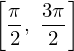

In [9]:
expr = sp.cos(x)
sp.solve(sp.cos(x), x)

Esta limitação pode ser contornada com a função `solveset`:

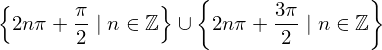

In [8]:
expr = sp.cos(x)
sp.solveset(sp.cos(x), x)

Ainda assim, poderíamos expressar a solução desta equação de modo bem simples:

$$ x  = \frac{\pi}{2} + k \pi\text{,} \qquad \text{com $k\in \mathbb{Z}$.}$$

## Saiba mais

* GIRALDO, V.; CARVALHO, L.M.. Funções e Novas Tecnologias. TEMA - Tendências em Matemática Aplicada e Computacional, [S.l.], v. 3, n. 1, p. 111-119, june 2002. ISSN 2179-8451. Available at: <https://tema.sbmac.org.br/tema/article/view/429>. Date accessed: 30 sep. 2019. doi:https://doi.org/10.5540/tema.2002.03.01.0111.

Este bloco de notas é baseado nos livros:

  - STEWART, John M. Python for scientists. Cambridge University Press, 2017.
  https://doi.org/10.1017/CBO9781107447875
  
  - JOHANSSON, Robert; JOHANSSON, Robert; JOHN, Suresh. Numerical Python. Apress, 2019.
   https://doi.org/10.1007/978-1-4842-4246-9

&copy; 2019 Vicente Helano<br>
UFCA | Universidade Federal do Cariri<br>
Mestrado Profissional em Ensino de Matemática